# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [50]:
import pandas as pd
pd.options.display.max_colwidth = None
!ls

Dataset TWO - Dogs.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [51]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values=['Unknown','UNKNOWN'])

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [19]:
df.shape #30,000 rows now
df.info
df.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [20]:
#the dataset is all licensed pet dogs in nyc. it has 30,000 rows and 19 columns. It has the owner's identifier as a zip code in 'Ownder Zip Code' and the dog's name as 'Animal Name'

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
# what's the oldest dog here?
# are there more spayed/neutered dogs than not?
# how many dogs are tri-colored?
# Which zip code has most dogs? 

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot: >

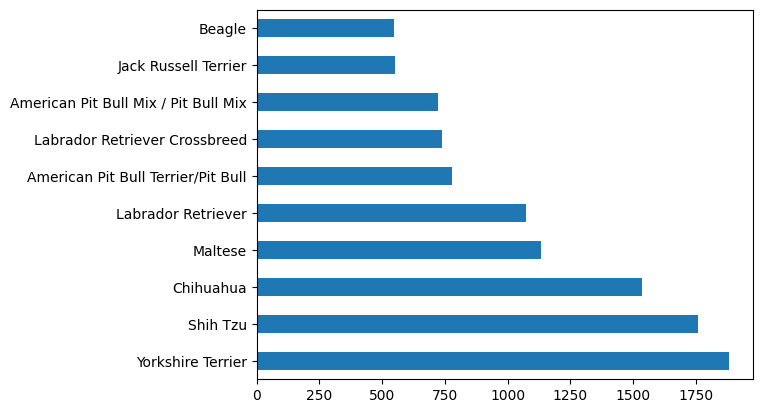

In [21]:
df['Primary Breed'].value_counts().head(10).plot(kind='barh')


## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [22]:
#^ accidnetally ran the top one's code with the changed na_values, so above is the answer!

## What are the most popular dog names?

In [25]:
#most popular dog names
df['Animal Name'].value_counts()

Max              202
Bella            193
Charlie          172
Lola             146
Rocky            140
                ... 
Bluno              1
DARBY              1
CHARLEY VIVAR      1
TINY               1
Squeeze            1
Name: Animal Name, Length: 13719, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [35]:

df[df['Animal Name'] == 'Shivani'] #surprisingly no dogs are named shivani
df[df['Animal Name'] == 'Max'].shape #202 dogs named Max
df[df['Animal Name'] == 'Maxwell'].shape #11 dogs named Maxwell


(202, 15)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [36]:
df['Guard or Trained'].value_counts(normalize=True) #0.08% are guard dogs

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [37]:
df['Guard or Trained'].value_counts() #17 are guard dogs

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [53]:
#no because there are many NaN values
df['Guard or Trained'].isnull().sum()
df['Guard or Trained']

0         No
1         No
2        NaN
3         No
4        NaN
        ... 
29995     No
29996     No
29997    NaN
29998     No
29999     No
Name: Guard or Trained, Length: 30000, dtype: object

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [52]:
df['Guard or Trained'].fillna('No') # learned this from https://sparkbyexamples.com/pandas/pandas-replace-nan-values-by-zero-in-a-column/#:~:text=Replace%20NaN%20Values%20with%20Zero%20on%20pandas%20DataFrame,but%20returns%20a%20new%20DataFrame.
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [54]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [63]:
#create column year for dog's birth year #NOTE TO SELF DONT RUN THIS AGAIN
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df['year']

df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [66]:
#CALCULATE AGE OF DOG
df['age'] = 2022 - df['year']
df.head()
df.age.median() #dogs median age is 12

12.0

# Joining data together

In [70]:
df = df.rename(columns={'Owner Zip Code': 'zip'}) #renaming column to use it as join key, credit to https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df.head()

,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [72]:
df2 = pd.read_csv('zipcodes-neighborhoods.csv')
df2.head()

#merge df and df2
df3 = pd.merge(df, df2, on='zip') #from https://pandas.pydata.org/docs/user_guide/merging.html
df3.head()



,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [76]:
#most popular dog breed in bronx
df3[df3['borough'] == 'Bronx']['Primary Breed'].value_counts().head(1) #Yorkshire Terrier in the Bronx
df3[df3['borough'] == 'Brooklyn']['Primary Breed'].value_counts().head(1) #also the Yorkshire Terrier in Brooklyn
df3[df3['neighborhood'] == 'Upper East Side']['Primary Breed'].value_counts().head(1) #Havanese in the Upper East Side

Havanese    94
Name: Primary Breed, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [82]:
#most popular dog breed in each neighborhood in all boroughs
df3.groupby('neighborhood')['Primary Breed'].value_counts()

#not sure how to do this one

neighborhood  Primary Breed              
Borough Park  Yorkshire Terrier              49
              Maltese                        34
              Shih Tzu                       34
              Chihuahua                      32
              Labrador Retriever             19
                                             ..
West Queens   Soft Coated Wheaten Terrier     1
              Tibetan Spaniel                 1
              Toy Fox Terrier                 1
              Weimaraner                      1
              Wire Fox Terrier                1
Name: Primary Breed, Length: 3987, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [110]:
df3[df3['Spayed or Neut'] == 'No']['Primary Breed'].value_counts() #yorkshire terriers are the most common breed of dogs that are not spayed/neutered
df3[df3['Spayed or Neut'] == 'No'][df3['Animal Gender'] == 'M'].value_counts(normalize=True) #<- did not work
 
df3[df3['Spayed or Neut'] == 'No'] #5273 dogs are not spayed/neutered
df3[df3['Spayed or Neut'] == 'No'][df3['Animal Gender'] == 'F'] #not sure I did this right but looks like 1930 of 5273 not-spayed dogs are female, so approx 36.6%
df3[df3['Spayed or Neut'] == 'No'][df3['Animal Gender'] == 'M'] #3343 of 5273 are not-neutered males, so approx 63.4%

/var/folders/t3/wdvr53w53sxctv2njm810gsh0000gn/T/ipykernel_76523/1522336813.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3['Spayed or Neut'] == 'No'][df3['Animal Gender'] == 'M'].value_counts(normalize=True) #<- did not work
/var/folders/t3/wdvr53w53sxctv2njm810gsh0000gn/T/ipykernel_76523/1522336813.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3['Spayed or Neut'] == 'No'][df3['Animal Gender'] == 'F'] #not sure I did this right but looks like 1930 of 5273 not-spayed dogs are female, so approx 36.6%
/var/folders/t3/wdvr53w53sxctv2njm810gsh0000gn/T/ipykernel_76523/1522336813.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3['Spayed or Neut'] == 'No'][df3['Animal Gender'] == 'M'] #3343 of 5273 are not-neutered males, so approx 63.4%


,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,borough
92,10024,Lil A,M,Yorkshire Terrier,NaN,BLACK,TAN,NaN,2003-12-01,No,No,Yes,2015-04-10 11:34:14.030,2015-04-10,2016-04-29,2003,19,Upper West Side,Manhattan
113,10024,King George Fitzgerald,M,Cavalier King Charles Spaniel,NaN,BLACK,WHITE,BROWN,2009-01-01,No,No,Yes,2015-04-29 09:05:58.987,2015-04-29,2016-06-08,2009,13,Upper West Side,Manhattan
156,10024,Manolito,M,"Poodle, Toy",NaN,SILVER,NaN,NaN,2010-03-01,No,No,Yes,2015-05-13 14:36:44.937,2015-05-13,2016-05-31,2010,12,Upper West Side,Manhattan
179,10024,Guero,M,Golden Retriever,NaN,WHITE,BLOND,NaN,2008-02-01,No,No,Yes,2015-05-22 15:16:23.813,2015-05-22,2016-06-16,2008,14,Upper West Side,Manhattan
181,10024,Wacho,M,Jack Russell Terrier,NaN,WHITE,BROWN,NaN,2012-10-01,No,No,Yes,2015-05-22 15:41:14.097,2015-05-22,2016-05-28,2012,10,Upper West Side,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29552,11436,ROCKBOTTOM GREEN,M,Cane Corso,NaN,Brindle,Tan,Gray,2015-03-01,No,NaN,Yes,2015-06-22 20:02:45.003,2015-06-22,2016-06-22,2015,7,Jamaica,Queens
29560,11436,Snickers Peanut Butter Pitt,M,American Pit Bull Mix / Pit Bull Mix,NaN,Brown,Brindle,White,2012-04-01,No,NaN,Yes,2015-07-14 13:41:26.977,2015-07-14,2016-07-14,2012,10,Jamaica,Queens
29561,11436,Noah,M,Maltese,NaN,WHITE,NaN,NaN,2010-10-01,No,No,No,2015-07-14 16:21:54.907,2015-07-14,2016-08-13,2010,12,Jamaica,Queens
29565,11436,Rocko,M,"Bull Dog, English",NaN,Tan,White,NaN,2015-03-01,No,NaN,Yes,2015-08-04 12:14:12.727,2015-08-04,2016-08-04,2015,7,Jamaica,Queens


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [109]:
#get dogs with only black, white, and grey fur
df3[df3['Animal Dominant Color'].str.contains('Black')] #couldn't get it

ValueError: Cannot mask with non-boolean array containing NA / NaN values

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot: >

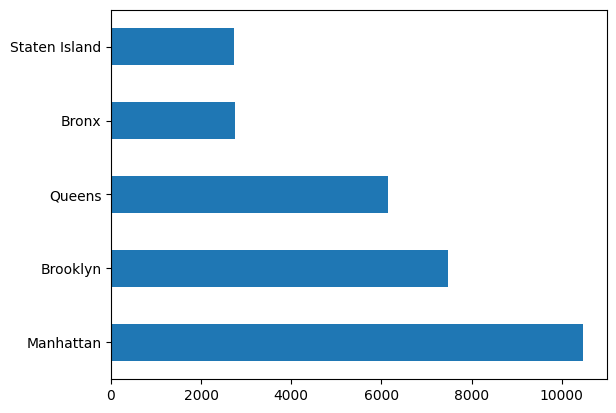

In [112]:
df3['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [131]:
df4 = pd.read_csv('boro_population.csv')
df4

#merge df4 and df3
df5 = pd.merge(df3, df4, on='borough') #from https://pandas.pydata.org/docs/user_guide/merging.html
df5.head()

#borough with most dogs per capita
#df3['borough'].value_counts() / df5['population'] ????


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
                 ..
Bronx           NaN
Brooklyn        NaN
Manhattan       NaN
Queens          NaN
Staten Island   NaN
Length: 29578, dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot: ylabel='borough,Primary Breed'>

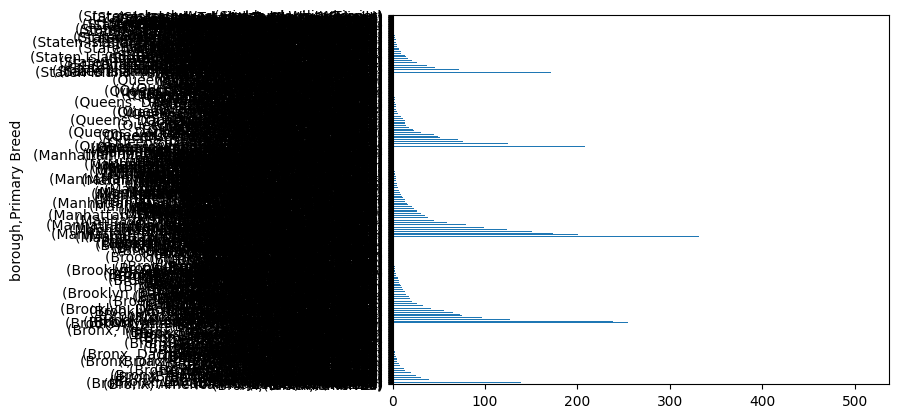

In [121]:
#top 5 breeds in each borough
#df3.groupby('borough')['Primary Breed'].value_counts().plot(kind='barh')


## What percentage of dogs are not guard dogs?

In [ ]:
#we filled in all NaN values with 'No' for the 'Guard or Trained' column so i'm not sure
